In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack

import warnings
warnings.filterwarnings("ignore")

In [2]:
mean = 0
std = 1
num_samples = 500000
white_noise = np.random.normal(mean, std, size=num_samples)

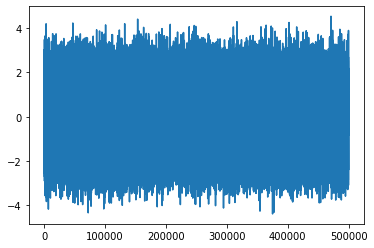

In [3]:
plt.plot(white_noise)

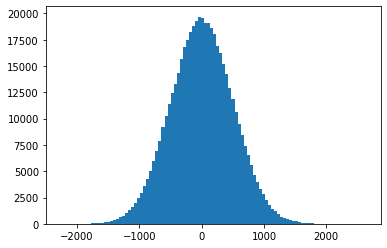

In [4]:
white_noise_fft = np.fft.fft(white_noise)

plt.hist(white_noise_fft, bins=100)
plt.show()

In [5]:
len(white_noise_fft)/2

250000.0

In [6]:
range(1, int(len(white_noise_fft)/2 + 1))

range(1, 250001)

In [7]:
fs =10000

In [8]:
x = np.arange(0,5000,0.02)
x.shape

(250000,)

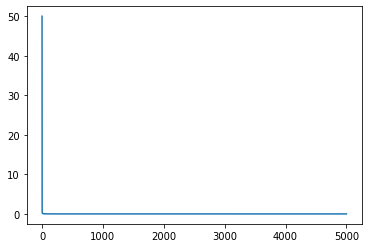

In [9]:
alpha=1
scale_first_half = [1/((i * 0.02) ** alpha) for i in range(1, int(len(white_noise_fft)/2 + 1))]


plt.plot(x, scale_first_half)

In [10]:
scale_second_half = scale_first_half[::-1]


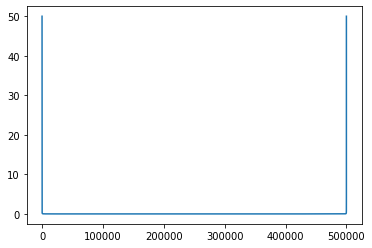

In [11]:
scale = scale_first_half + scale_second_half

plt.plot(scale)

In [12]:
scale = np.array(scale)

In [13]:
scale[scale>1] = 0.00001

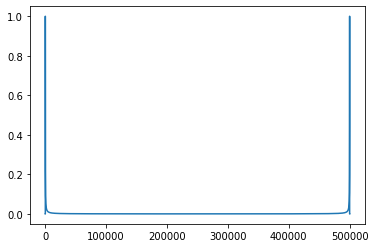

In [14]:
plt.plot(scale)

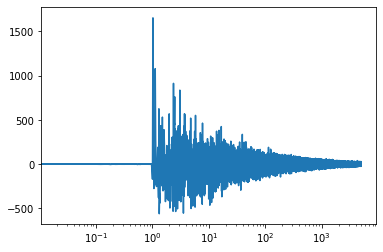

In [18]:
alpha = 1
fs = 10000
# scale_first_half = [1/(i ** alpha) * 1 for i in range(1, len(white_noise_freq))/2 + 1)]


pink_noise_freq = white_noise_fft * np.sqrt(scale)

psd = np.abs(pink_noise_freq) ** 2
fftfreq = sp.fftpack.fftfreq(len(psd),1/fs)

i = fftfreq < 200
data_back_freq = 10 * np.log10(psd)

plt.plot(fftfreq, pink_noise_freq)
plt.xscale('log')

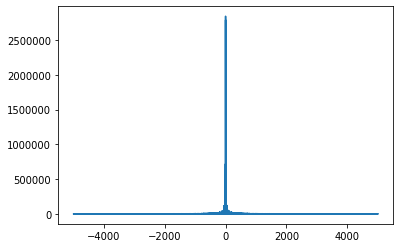

In [19]:
plt.plot(fftfreq,psd)
#plt.xlim([1,5000])
#plt.ylim([0,500000])
#plt.xscale('log')

In [ ]:
y = data_back_freq[i]

f = fftfreq[i]

print(f)
plt.plot(f,y)

In [ ]:
y_new = y/f

In [ ]:
plt.plot(f,y_new)

In [ ]:
data_back_freq_towhite=data_back_freq.real/()

plt.plot(fftfreq[i], data_back_freq[i])

In [ ]:
pink_noise = np.fft.ifft(pink_noise_freq)
plt.plot(pink_noise.real)


In [ ]:
plt.hist(pink_noise.real, bins=100)
plt.show()

In [ ]:
signal = [2000 for i in range(1, num_samples+1)]
data = signal + pink_noise
plt.plot(data)

In [ ]:
plt.hist(data,bins=100)
plt.show()

In [ ]:

scale_back = [i for i in range(1, len(white_noise_freq) + 1)]
data_freq = np.fft.fft(data)
data_back_freq = data_freq * scale_back


plt.plot(data_back_freq[1:])

In [ ]:
singal_back = np.fft.ifft(data_back_freq)
plt.plot(singal_back.real)


In [ ]:
plt.plot(white_noise + 2000 - singal_back.real)

In [ ]:
plt.plot(singal_back.real)